# **House Price prediction:** A Regression Analysis

In [393]:
import pandas as pd
import numpy as np
from scipy.stats import skew
import matplotlib.pyplot as mp
import seaborn as sn

In [394]:
data=pd.read_csv("/content/drive/MyDrive/data.csv")
pd.set_option('display.max_columns',None)

# Phase 1:**Data cleaning:-**Checking out the dataset

In [395]:
data.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [396]:
data.shape # the output shows that there were 18 columns and 4600 rows

(4600, 18)

In [397]:
data.info() # there are 3 type of data types :-object , float, int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [398]:
data.isnull().sum() # no null values

,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


# Checking for unique values which will help in feature encoding

In [399]:
country= data['country'].unique()
state=data['statezip'].unique()
city=data['city'].unique()
street=data['street'].unique()


In [400]:
print("Checking the country",country)
print("Checking the city",street)

Checking the country ['USA']
Checking the city ['18810 Densmore Ave N' '709 W Blaine St' '26206-26214 143rd Ave SE' ...
 '759 Ilwaco Pl NE' '5148 S Creston St' '18717 SE 258th St']


In [401]:
print( data['street']=='...')


0       False
1       False
2       False
3       False
4       False
        ...  
4595    False
4596    False
4597    False
4598    False
4599    False
Name: street, Length: 4600, dtype: bool


In [402]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [403]:
print("Checking the city",street)

Checking the city ['18810 Densmore Ave N' '709 W Blaine St' '26206-26214 143rd Ave SE' ...
 '759 Ilwaco Pl NE' '5148 S Creston St' '18717 SE 258th St']


# Statistical analysis


In [404]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


Removing rows of price, bedroom and bathrooms as 0

In [405]:
data = data[(data['price'] > 0) & (data['bedrooms'] > 0) & (data['bathrooms'] > 0)]

# Again checking the statistical analysis

In [406]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.549000e+03,4549.000000,4549.000000,4549.000000,4.549000e+03,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000
mean,5.576257e+05,3.396131,2.155968,2131.578809,1.483460e+04,1.511651,0.006595,0.234337,3.449549,1821.291932,310.286876,1970.787206,808.036272
std,5.638915e+05,0.901988,0.775205,955.234941,3.597114e+04,0.537794,0.080949,0.765085,0.675242,853.292493,462.043404,29.763891,979.313181
min,7.800000e+03,1.000000,0.750000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.261000e+05,3.000000,1.750000,1460.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.650000e+05,3.000000,2.250000,1970.000000,7.680000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.575000e+05,4.000000,2.500000,2610.000000,1.097000e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,600.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


# Checking for duplicate values


In [407]:
data.duplicated().sum() # 0 means false/ none

0

# Checking for skewness, outliers and if scaling is needed or not

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>],
       [<Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>],
       [<Axes: title={'center': 'yr_renovated'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

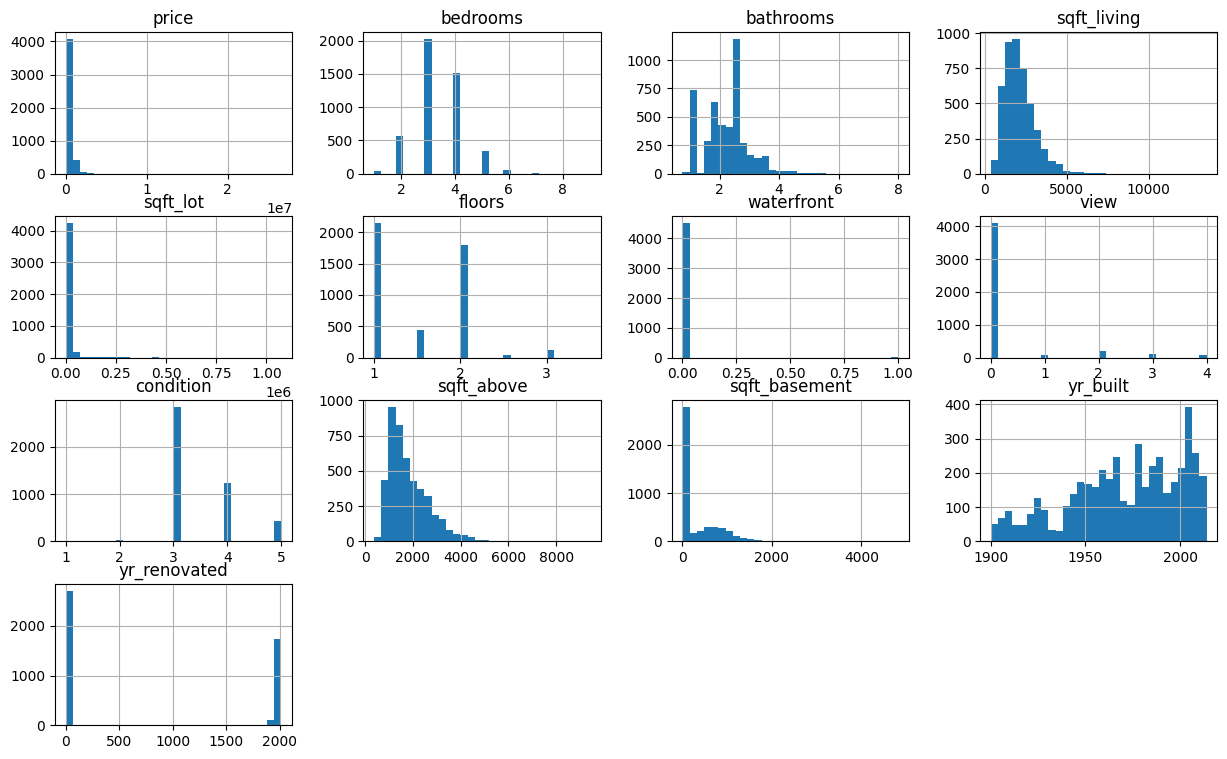

In [408]:
data.hist(bins=30,figsize=(15, 9)) # checking for skewness and scaling is required or not


**Scaling is required but we will check the accuracy after scaling and before scaling **


In [409]:
# calculating skewness % # we can calculate skew value for a numeric columns only
sk_sqft_above = skew(data['sqft_above'])
sk_bathroom = skew(data['bathrooms'])
sk_sqft_living = skew(data['sqft_living'])
sk_condition=skew(data['condition'])
#print("Skewness:", sk_sqft_above,sk_bathroom,sk_sqft_living,sk_condition)



# Checking for outliers using box plot

<Axes: >

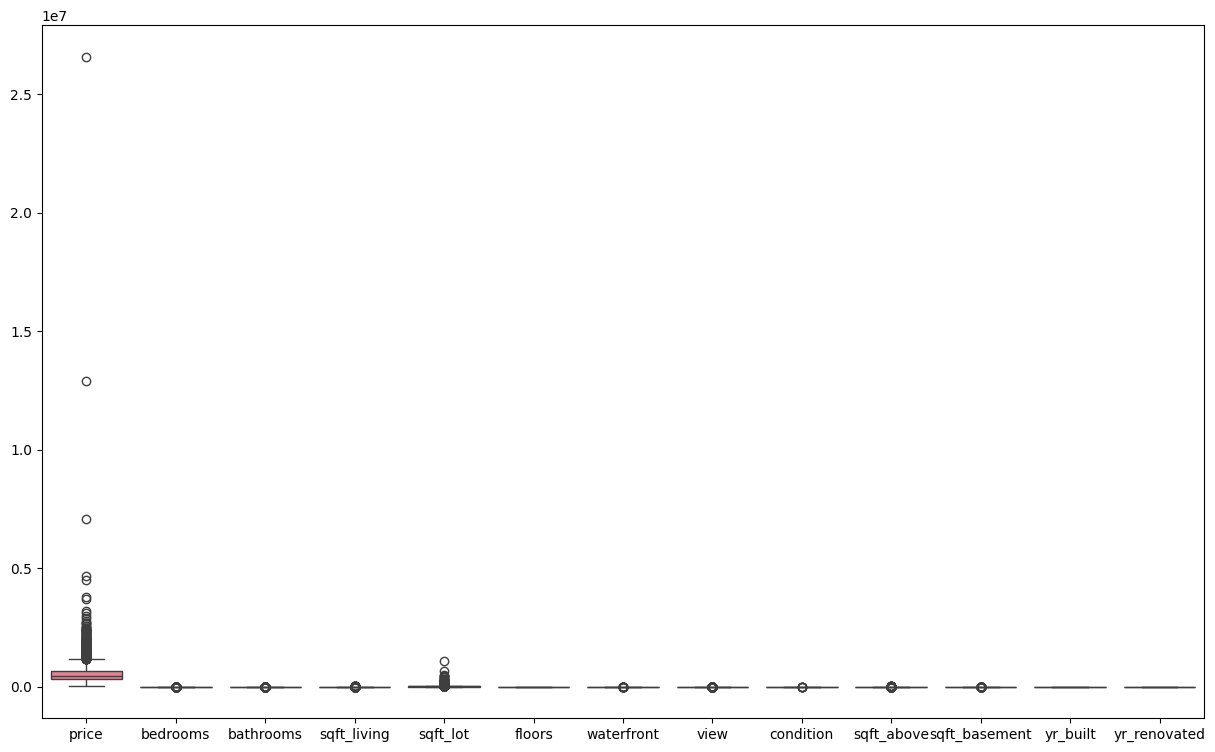

In [410]:
mp.figure(figsize=(15, 9))  # since we can see the housing price has largest outliers and it is the target variable we will not do anything to remove outliers so in this project we will see the model accuracy with outliers and after reducing outliers.
sn.boxplot(data)

# **Feature engineering**

In [411]:
current_year=2024
# price per square feet
data['price_per_sqft'] = data['price'] / data['sqft_living']
#Age of the property
data['age_at_sale'] = current_year - data['yr_built']
# Calculate years since renovation (assuming 0 means not renovated)
data['age_renovation'] = np.where(data['yr_renovated'] == 0, 0, current_year - data['yr_renovated'])



<ipython-input-411-c42fccba84d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price_per_sqft'] = data['price'] / data['sqft_living']
<ipython-input-411-c42fccba84d1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age_at_sale'] = current_year - data['yr_built']
<ipython-input-411-c42fccba84d1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

In [413]:
data.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,price_per_sqft,age_at_sale,age_renovation
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,233.582090,69,19
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,653.150685,103,0
2,2014-05-02 00:00:00,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,177.202073,58,0


In [414]:
# splitting date(date of sold feature)
data['date']= pd.to_datetime(data['date'])
data["yr_sold"]=data['date'].dt.year
data["month_sold"]=data['date'].dt.month
data["day_sold"]=data['date'].dt.day
data["quater_sold"]=data['date'].dt.quarter

<ipython-input-414-2a88d8b44982>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date']= pd.to_datetime(data['date'])
<ipython-input-414-2a88d8b44982>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["yr_sold"]=data['date'].dt.year
<ipython-input-414-2a88d8b44982>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [415]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,price_per_sqft,age_at_sale,age_renovation,yr_sold,month_sold,day_sold,quater_sold
0,2014-05-02,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,233.582090,69,19,2014,5,2,2
1,2014-05-02,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,653.150685,103,0,2014,5,2,2
2,2014-05-02,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,177.202073,58,0,2014,5,2,2
3,2014-05-02,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,210.000000,61,0,2014,5,2,2
4,2014-05-02,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,283.505155,48,32,2014,5,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA,204.083885,70,45,2014,7,9,3
4596,2014-07-09,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA,365.981735,41,15,2014,7,9,3
4597,2014-07-09,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA,138.506368,15,0,2014,7,9,3
4598,2014-07-10,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA,97.320574,50,0,2014,7,10,3


In [416]:
data.drop(columns=['date', 'country'], inplace=True)

<ipython-input-416-8ce2edc0c246>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['date', 'country'], inplace=True)


# **Label encoding in 2 ways: 1 done for city and second way is done for street and streetzip**

In [417]:
print(city)

['Shoreline' 'Seattle' 'Kent' 'Bellevue' 'Redmond' 'Maple Valley'
 'North Bend' 'Lake Forest Park' 'Sammamish' 'Auburn' 'Des Moines'
 'Bothell' 'Federal Way' 'Kirkland' 'Issaquah' 'Woodinville'
 'Normandy Park' 'Fall City' 'Renton' 'Carnation' 'Snoqualmie' 'Duvall'
 'Burien' 'Covington' 'Inglewood-Finn Hill' 'Kenmore' 'Newcastle'
 'Mercer Island' 'Black Diamond' 'Ravensdale' 'Clyde Hill' 'Algona'
 'Skykomish' 'Tukwila' 'Vashon' 'Yarrow Point' 'SeaTac' 'Medina'
 'Enumclaw' 'Snoqualmie Pass' 'Pacific' 'Beaux Arts Village' 'Preston'
 'Milton']


In [420]:
city_num={'Shoreline':1, 'Seattle':2 ,'Kent':3, 'Bellevue':4, 'Redmond':5, 'Maple Valley':6,
 'North Bend':7, 'Lake Forest Park':8 ,'Sammamish':9 ,'Auburn':10, 'Des Moines':11,
 'Bothell':12, 'Federal Way':13, 'Kirkland':14, 'Issaquah':15, 'Woodinville':16,
 'Normandy Park':17, 'Fall City':18 ,'Renton':19, 'Carnation':20, 'Snoqualmie':21, 'Duvall':22,
 'Burien':23 ,'Covington':24 ,'Inglewood-Finn Hill':25 ,'Kenmore':26, 'Newcastle':27,
 'Mercer Island':28,  'Black Diamond':29 ,'Ravensdale':30, 'Clyde Hill':31 ,'Algona':32,
 'Skykomish':33, 'Tukwila':34, 'Vashon':35, 'Yarrow Point':36, 'SeaTac':37, 'Medina':38,
 'Enumclaw':39,'Snoqualmie Pass':40, 'Pacific':41 ,'Beaux Arts Village':42, 'Preston':43,
 'Milton':44}

In [421]:
city_num

{'Shoreline': 1,
 'Seattle': 2,
 'Kent': 3,
 'Bellevue': 4,
 'Redmond': 5,
 'Maple Valley': 6,
 'North Bend': 7,
 'Lake Forest Park': 8,
 'Sammamish': 9,
 'Auburn': 10,
 'Des Moines': 11,
 'Bothell': 12,
 'Federal Way': 13,
 'Kirkland': 14,
 'Issaquah': 15,
 'Woodinville': 16,
 'Normandy Park': 17,
 'Fall City': 18,
 'Renton': 19,
 'Carnation': 20,
 'Snoqualmie': 21,
 'Duvall': 22,
 'Burien': 23,
 'Covington': 24,
 'Inglewood-Finn Hill': 25,
 'Kenmore': 26,
 'Newcastle': 27,
 'Mercer Island': 28,
 'Black Diamond': 29,
 'Ravensdale': 30,
 'Clyde Hill': 31,
 'Algona': 32,
 'Skykomish': 33,
 'Tukwila': 34,
 'Vashon': 35,
 'Yarrow Point': 36,
 'SeaTac': 37,
 'Medina': 38,
 'Enumclaw': 39,
 'Snoqualmie Pass': 40,
 'Pacific': 41,
 'Beaux Arts Village': 42,
 'Preston': 43,
 'Milton': 44}

In [422]:
data['city']=data['city'].map(city_num)

<ipython-input-422-39df373ec864>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['city']=data['city'].map(city_num)


In [423]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,price_per_sqft,age_at_sale,age_renovation,yr_sold,month_sold,day_sold,quater_sold
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,1,WA 98133,233.582090,69,19,2014,5,2,2
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,2,WA 98119,653.150685,103,0,2014,5,2,2
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,3,WA 98042,177.202073,58,0,2014,5,2,2
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,4,WA 98008,210.000000,61,0,2014,5,2,2
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,5,WA 98052,283.505155,48,32,2014,5,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,2,WA 98133,204.083885,70,45,2014,7,9,3
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,4,WA 98007,365.981735,41,15,2014,7,9,3
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,19,WA 98059,138.506368,15,0,2014,7,9,3
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,2,WA 98178,97.320574,50,0,2014,7,10,3


In [427]:
from sklearn.preprocessing import LabelEncoder

In [426]:
encoder = LabelEncoder()


data['statezip'] = encoder.fit_transform(data['statezip'])
data['street']= encoder.fit_transform(data['street'])

# Show the dataset with the encoded column
print(data)

             price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     3.130000e+05       3.0       1.50         1340      7912     1.5   
1     2.384000e+06       5.0       2.50         3650      9050     2.0   
2     3.420000e+05       3.0       2.00         1930     11947     1.0   
3     4.200000e+05       3.0       2.25         2000      8030     1.0   
4     5.500000e+05       4.0       2.50         1940     10500     1.0   
...            ...       ...        ...          ...       ...     ...   
4595  3.081667e+05       3.0       1.75         1510      6360     1.0   
4596  5.343333e+05       3.0       2.50         1460      7573     2.0   
4597  4.169042e+05       3.0       2.50         3010      7014     2.0   
4598  2.034000e+05       4.0       2.00         2090      6630     1.0   
4599  2.206000e+05       3.0       2.50         1490      8102     2.0   

      waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0              0     0          3    

<ipython-input-426-00c6cef9bf8f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['statezip'] = encoder.fit_transform(data['statezip'])
<ipython-input-426-00c6cef9bf8f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['street']= encoder.fit_transform(data['street'])


# **Checking the skweness after feature engineering**

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>],
       [<Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'sqft_above'}>],
       [<Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'street'}>,
        <Axes: title={'center': 'city'}>],
       [<Axes: title={'center': 'statezip'}>,
        <Axes: title={'center': 'price_per_sqft'}>,
        <Axes: title={'center': 'age_at_sale'}>,
        <Axes: title={'center': 'age_renovation'}>,
        <Axes: title={'center': 'yr_sold'}>],
       [<Axes: title={'center': 'month_sold'}>,
        <Ax

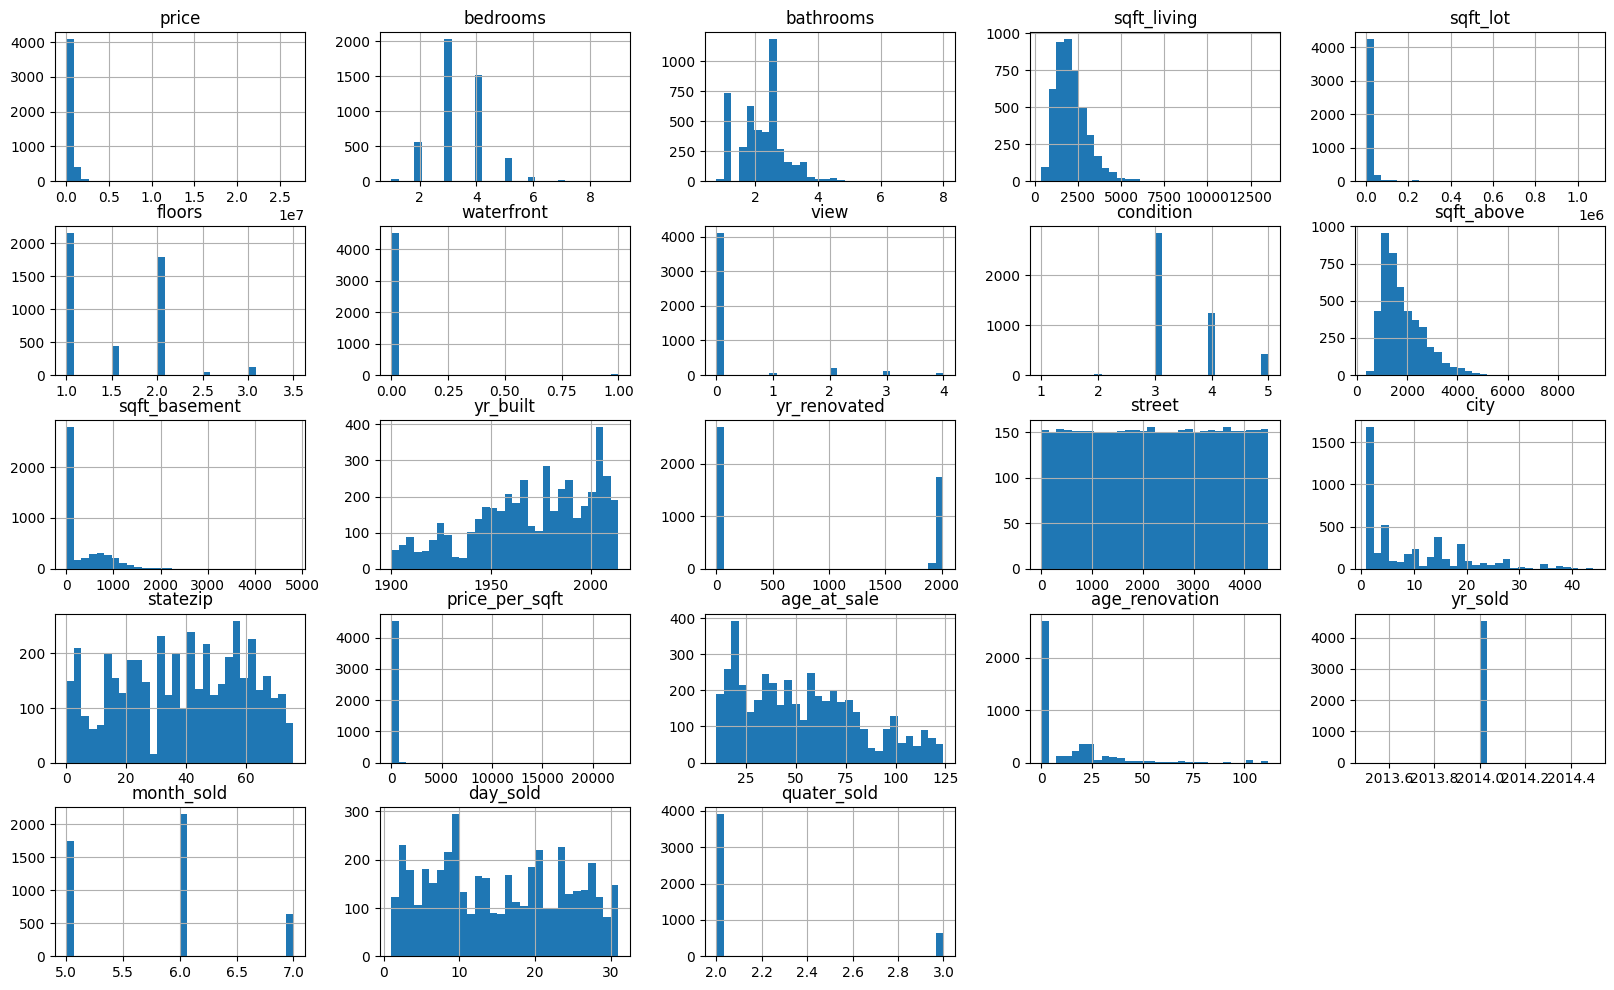

In [428]:
data.hist(bins=30,figsize=(20, 12))

In [429]:
Sk=data.skew() # checking skew of whole dataset
print(Sk)


price             25.040753
bedrooms           0.489793
bathrooms          0.595278
sqft_living        1.720951
sqft_lot          11.327371
floors             0.546627
waterfront        12.195821
view               3.377311
condition          0.963881
sqft_above         1.453664
sqft_basement      1.654452
yr_built          -0.505297
yr_renovated       0.387147
street            -0.003025
city               1.217658
statezip          -0.147949
price_per_sqft    53.634878
age_at_sale        0.505297
age_renovation     2.574194
yr_sold            0.000000
month_sold         0.349682
day_sold           0.107264
quater_sold        2.046689
dtype: float64


# **Checking outliers with new features**

<Axes: >

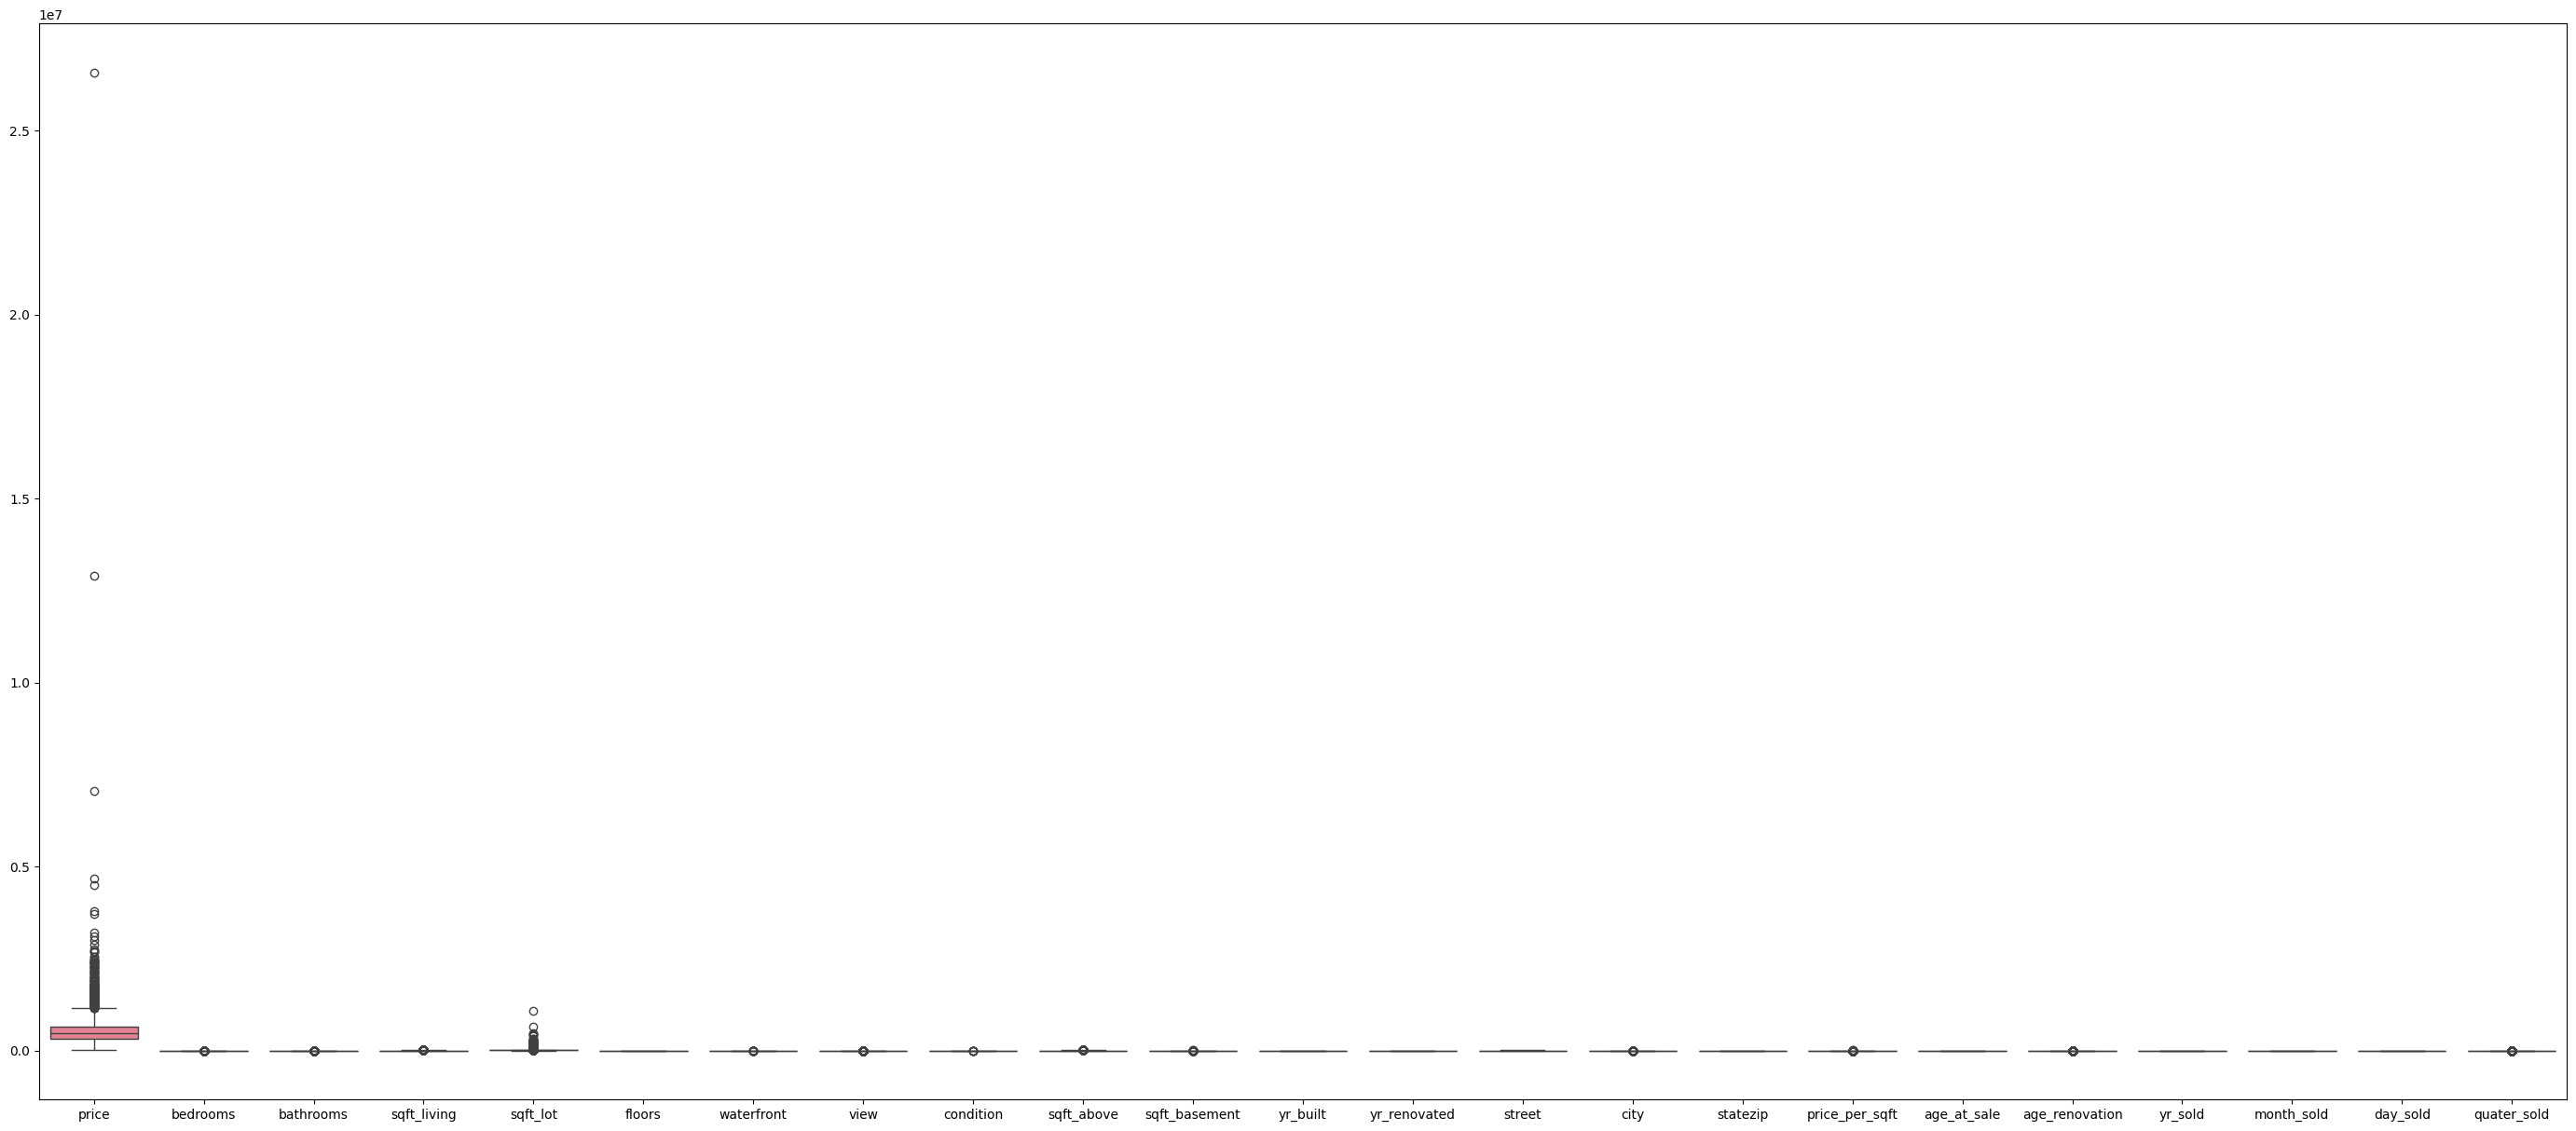

In [430]:
mp.figure(figsize=(35, 15))
sn.boxplot(data)

<Axes: ylabel='sqft_lot'>

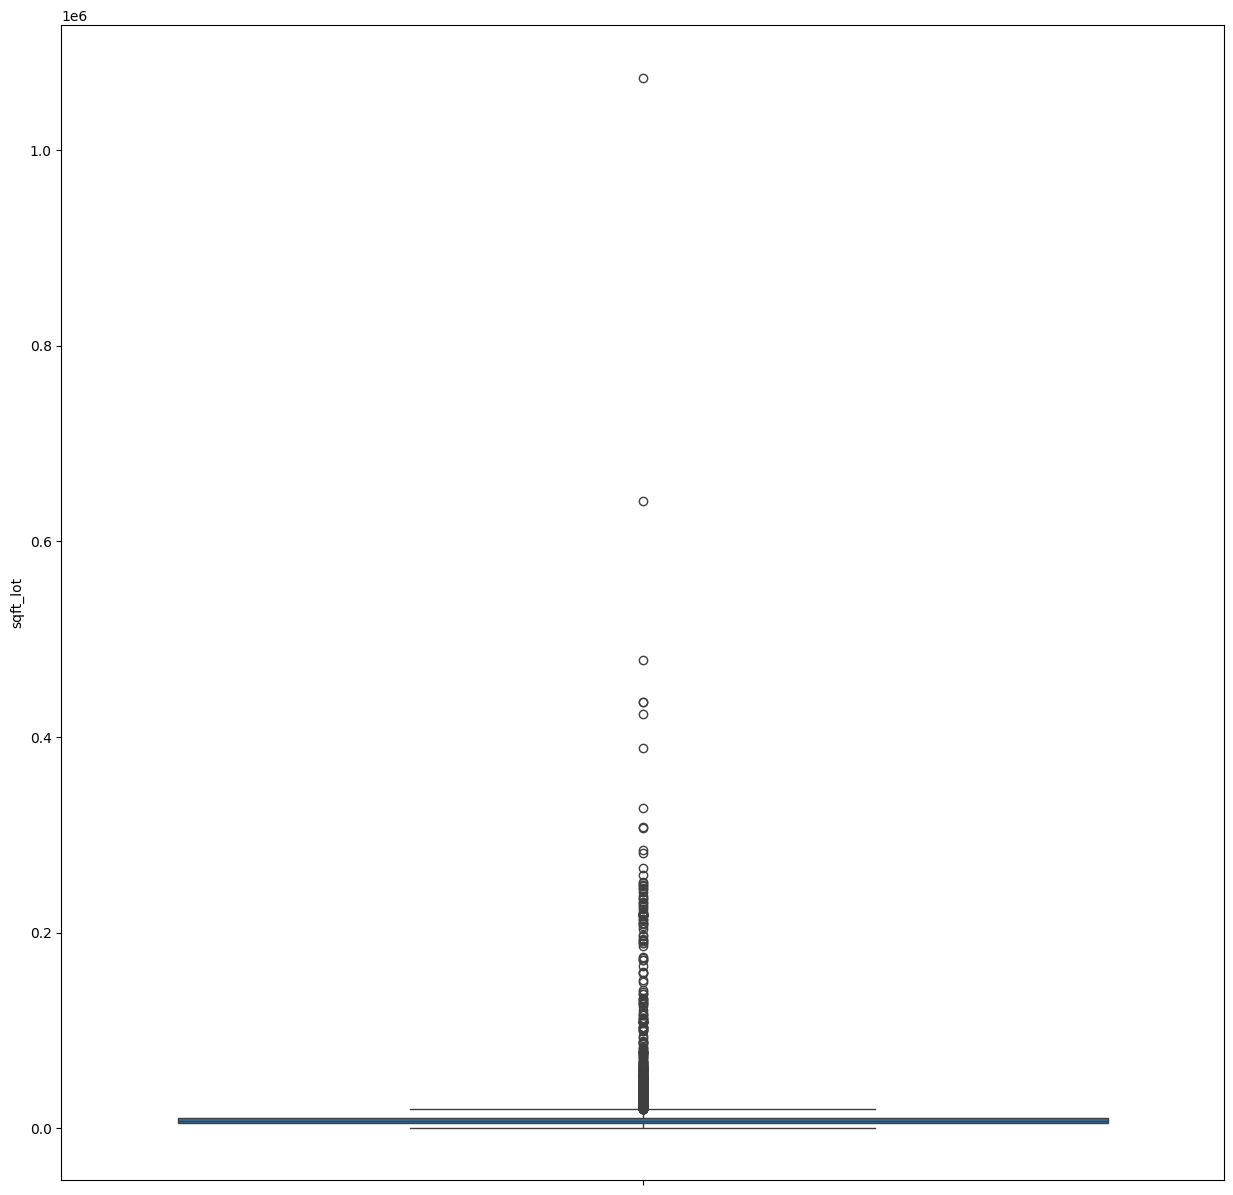

In [433]:
mp.figure(figsize=(15, 15))
sn.boxplot(data['sqft_lot'])

# **Removing Outliers**

In [434]:
# detecting outliers using box plot
# since proce is th target variable we will be using that variable as a main variable for the detection
def plot(df,col):
    fig,(ax1,ax2,ax3)= mp.subplots(3,1)
    sn.distplot(df[col],ax=ax1)
    sn.boxplot(df[col],ax=ax2)
    sn.distplot(df[col],ax=ax3, kde=False)

<ipython-input-434-e5096c95ef41>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df[col],ax=ax1)
<ipython-input-434-e5096c95ef41>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df[col],ax=ax3, kde=False)


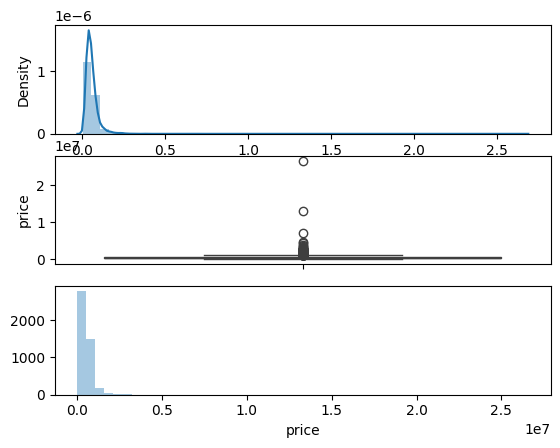

In [435]:
plot(data,'price')

<ipython-input-434-e5096c95ef41>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df[col],ax=ax1)
<ipython-input-434-e5096c95ef41>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df[col],ax=ax3, kde=False)


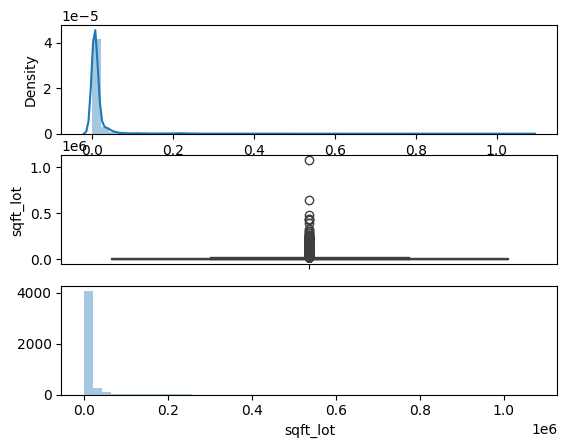

In [436]:
plot(data,'sqft_lot')

Removing the outliers from sqft_lot

In [437]:
q1=data['sqft_lot'].quantile(0.25)
q3=data['sqft_lot'].quantile(0.75)
iqr=q3-q1
maximum=q3+1.5*iqr
minimum=q3-1.5*iqr
print(maximum)
print(minimum)

19925.0
2015.0


In [438]:
len([s for s in data['sqft_lot']if (s>maximum) or (s<minimum)])

814

In [439]:
data['sqft_lot'] = np.where(data['sqft_lot'] >= maximum, data['sqft_lot'].median(), data['sqft_lot'])
data['sqft_lot'] = np.where(data['sqft_lot'] <= minimum, data['sqft_lot'].median(), data['sqft_lot'])

<ipython-input-439-f364f0466cb9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sqft_lot'] = np.where(data['sqft_lot'] >= maximum, data['sqft_lot'].median(), data['sqft_lot'])
<ipython-input-439-f364f0466cb9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sqft_lot'] = np.where(data['sqft_lot'] <= minimum, data['sqft_lot'].median(), data['sqft_lot'])


<ipython-input-434-e5096c95ef41>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df[col],ax=ax1)
<ipython-input-434-e5096c95ef41>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df[col],ax=ax3, kde=False)


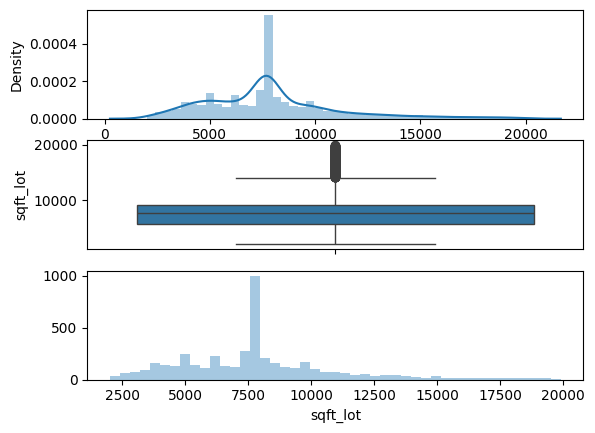

In [440]:
plot(data,'sqft_lot')

Removing outliers for price


In [441]:
q1=data['price'].quantile(0.25)
q3=data['price'].quantile(0.75)
iqr=q3-q1
max_p=q3+1.5*iqr
min_p=q3-1.5*iqr
print(max_p)
print(min_p)

1154600.0
160400.0


In [442]:
len([p for p in data['price']if (p>max_p) or (p<min_p)])

315

In [443]:
data['price'] = np.where(data['price'] >= max_p, data['price'].median(), data['price'])
data['price'] = np.where(data['price'] <= min_p, data['price'].median(), data['price'])

<ipython-input-443-89a3eb930e58>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price'] = np.where(data['price'] >= max_p, data['price'].median(), data['price'])
<ipython-input-443-89a3eb930e58>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price'] = np.where(data['price'] <= min_p, data['price'].median(), data['price'])


<ipython-input-434-e5096c95ef41>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df[col],ax=ax1)
<ipython-input-434-e5096c95ef41>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df[col],ax=ax3, kde=False)


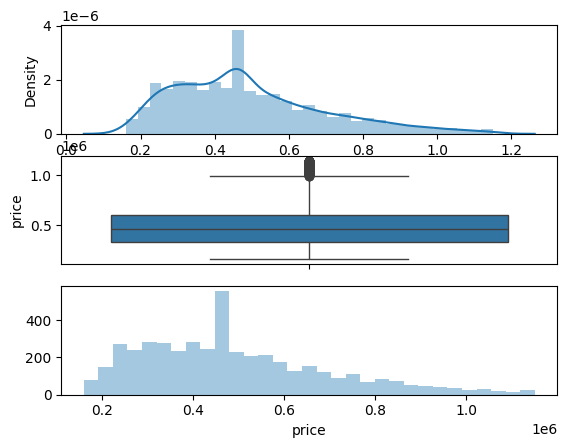

In [444]:
plot(data,'price')

In [445]:
data['price'] = data['price'].astype(int)
data['price'].unique()

<ipython-input-445-430ccb6ccfef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price'] = data['price'].astype(int)


array([313000, 465000, 342000, ..., 416904, 203400, 220600])

# **Exploratory Data Analysis**

* Price vs age at sale
* Price vs, age at renovation
* Price vs Street
* Price vs City
* Price vs no of bedrooms
* price vs no of floors
* Heat map to see how features correlate with each other. Helps in feature selection and detecting multicollinearity.




In [447]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'street', 'city', 'statezip',
       'price_per_sqft', 'age_at_sale', 'age_renovation', 'yr_sold',
       'month_sold', 'day_sold', 'quater_sold'],
      dtype='object')

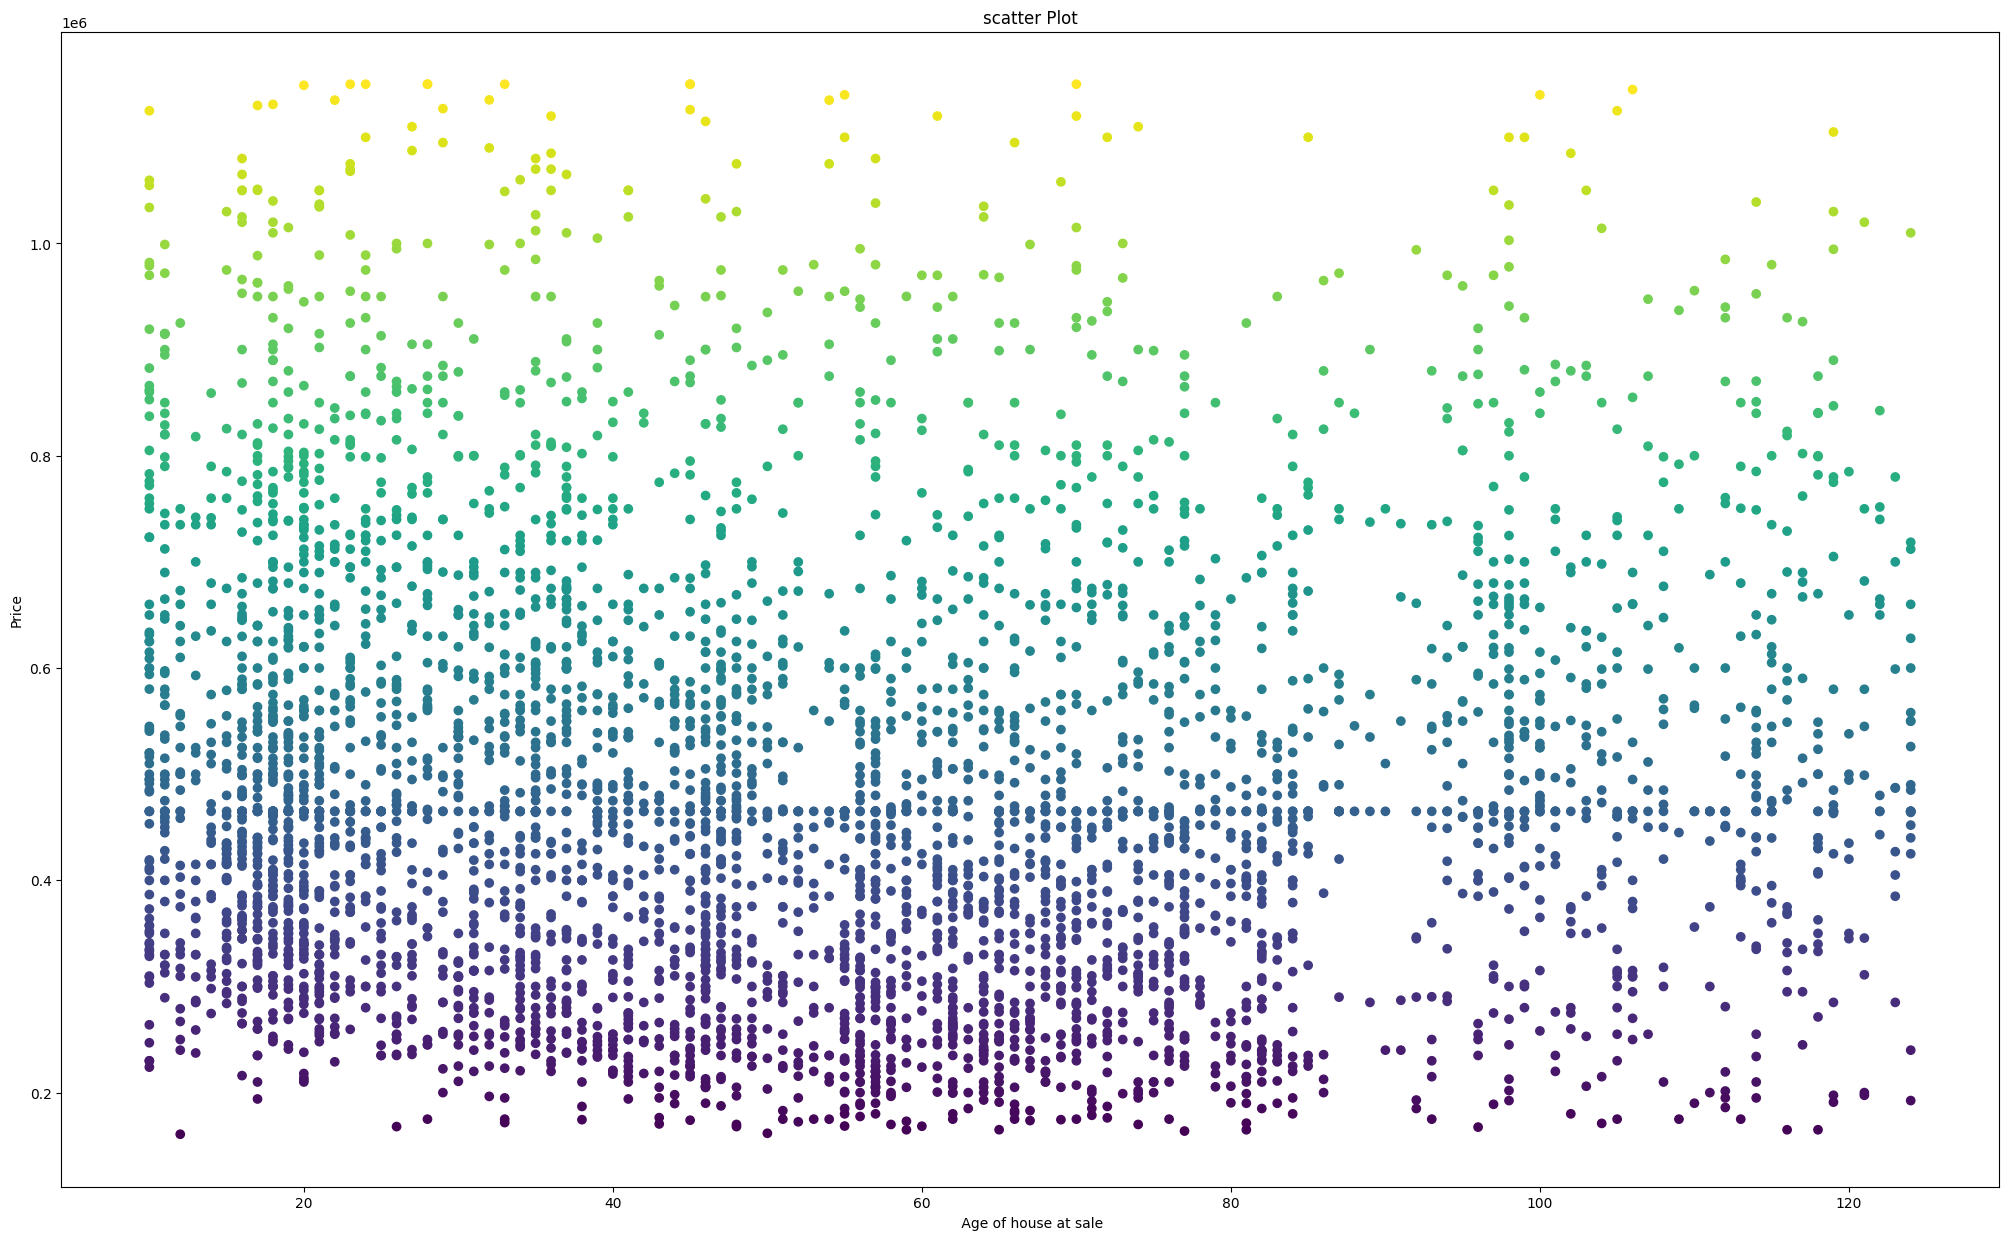

In [446]:

mp.figure(figsize=(25, 15))
mp.scatter(data['age_at_sale'],data['price'], c=data['price'], cmap='viridis')
mp.title('scatter Plot')
mp.xlabel(' Age of house at sale')
mp.ylabel('Price')
mp.show()

<ipython-input-448-1fc62b374f03>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x='age_renovation', y='price', data=data, palette='coolwarm')


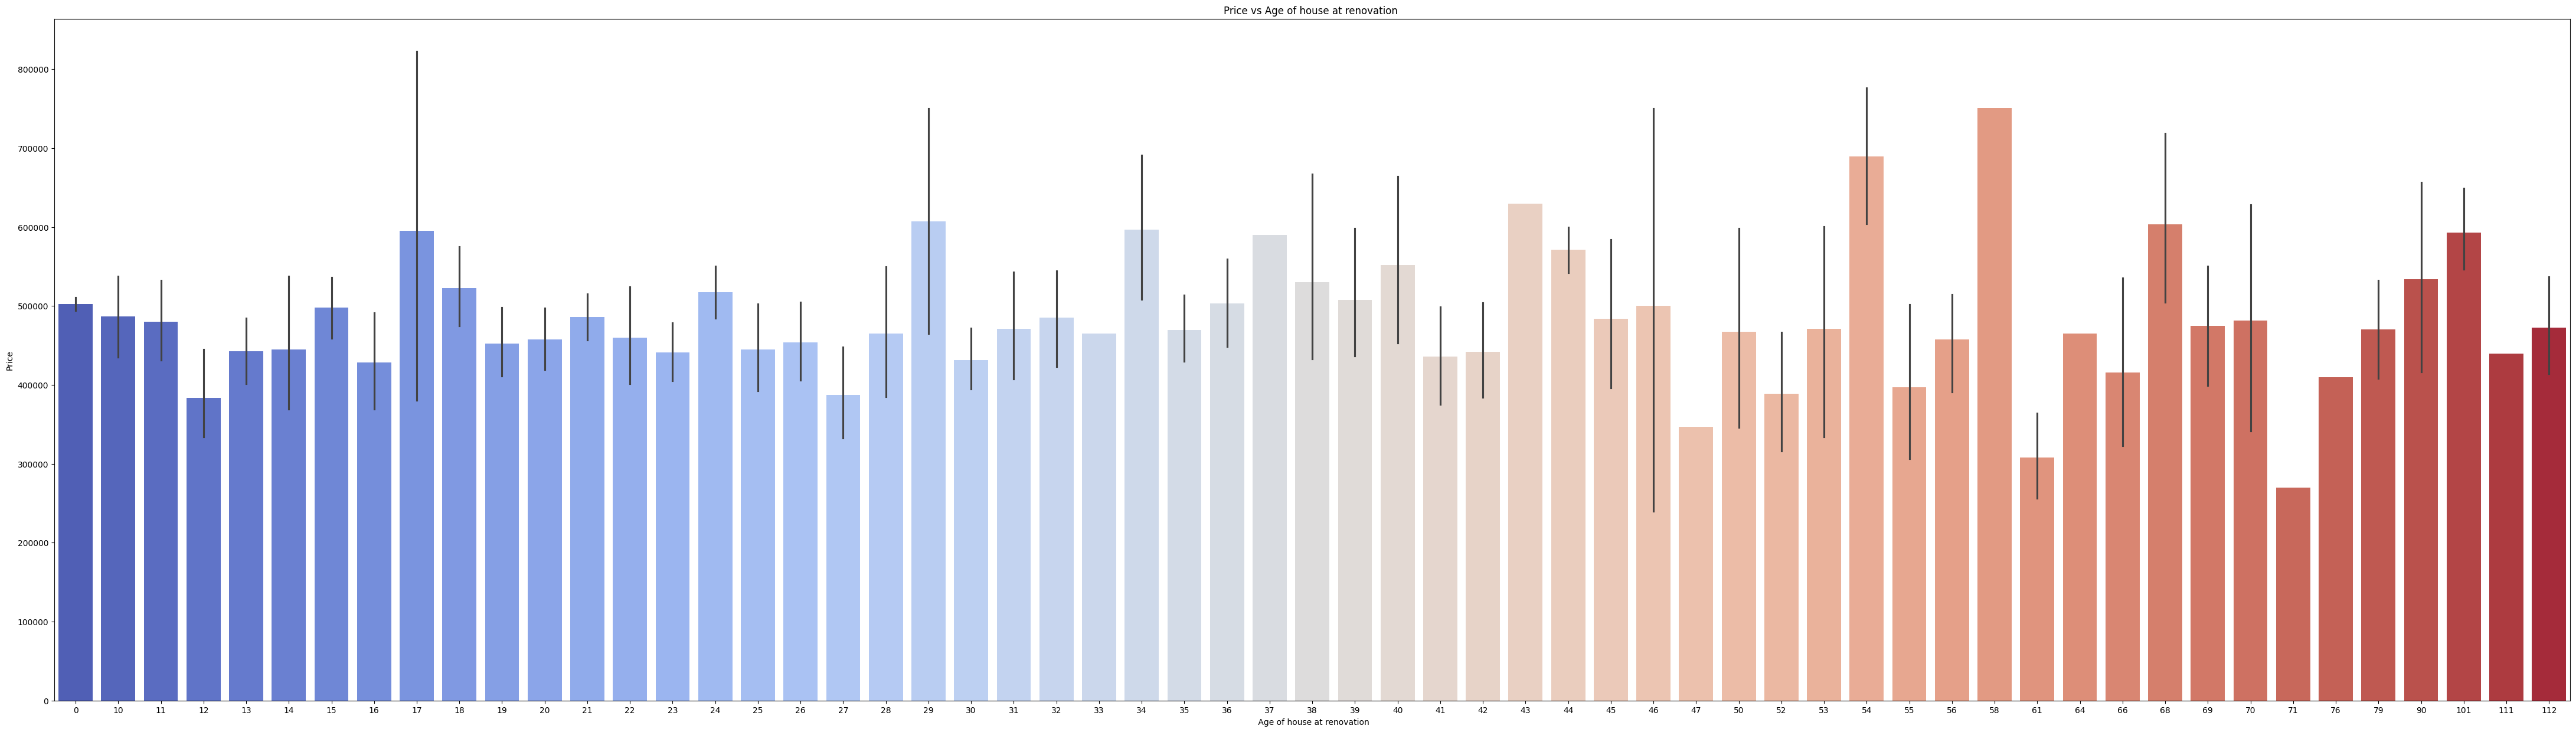

In [448]:
mp.figure(figsize=(55, 15))
sn.barplot(x='age_renovation', y='price', data=data, palette='coolwarm')
mp.title('Price vs Age of house at renovation ')
mp.xlabel(' Age of house at renovation')
mp.ylabel('Price')
mp.show()

<ipython-input-449-aba0ccfaa53f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x='city', y='price', data=data, palette='inferno')


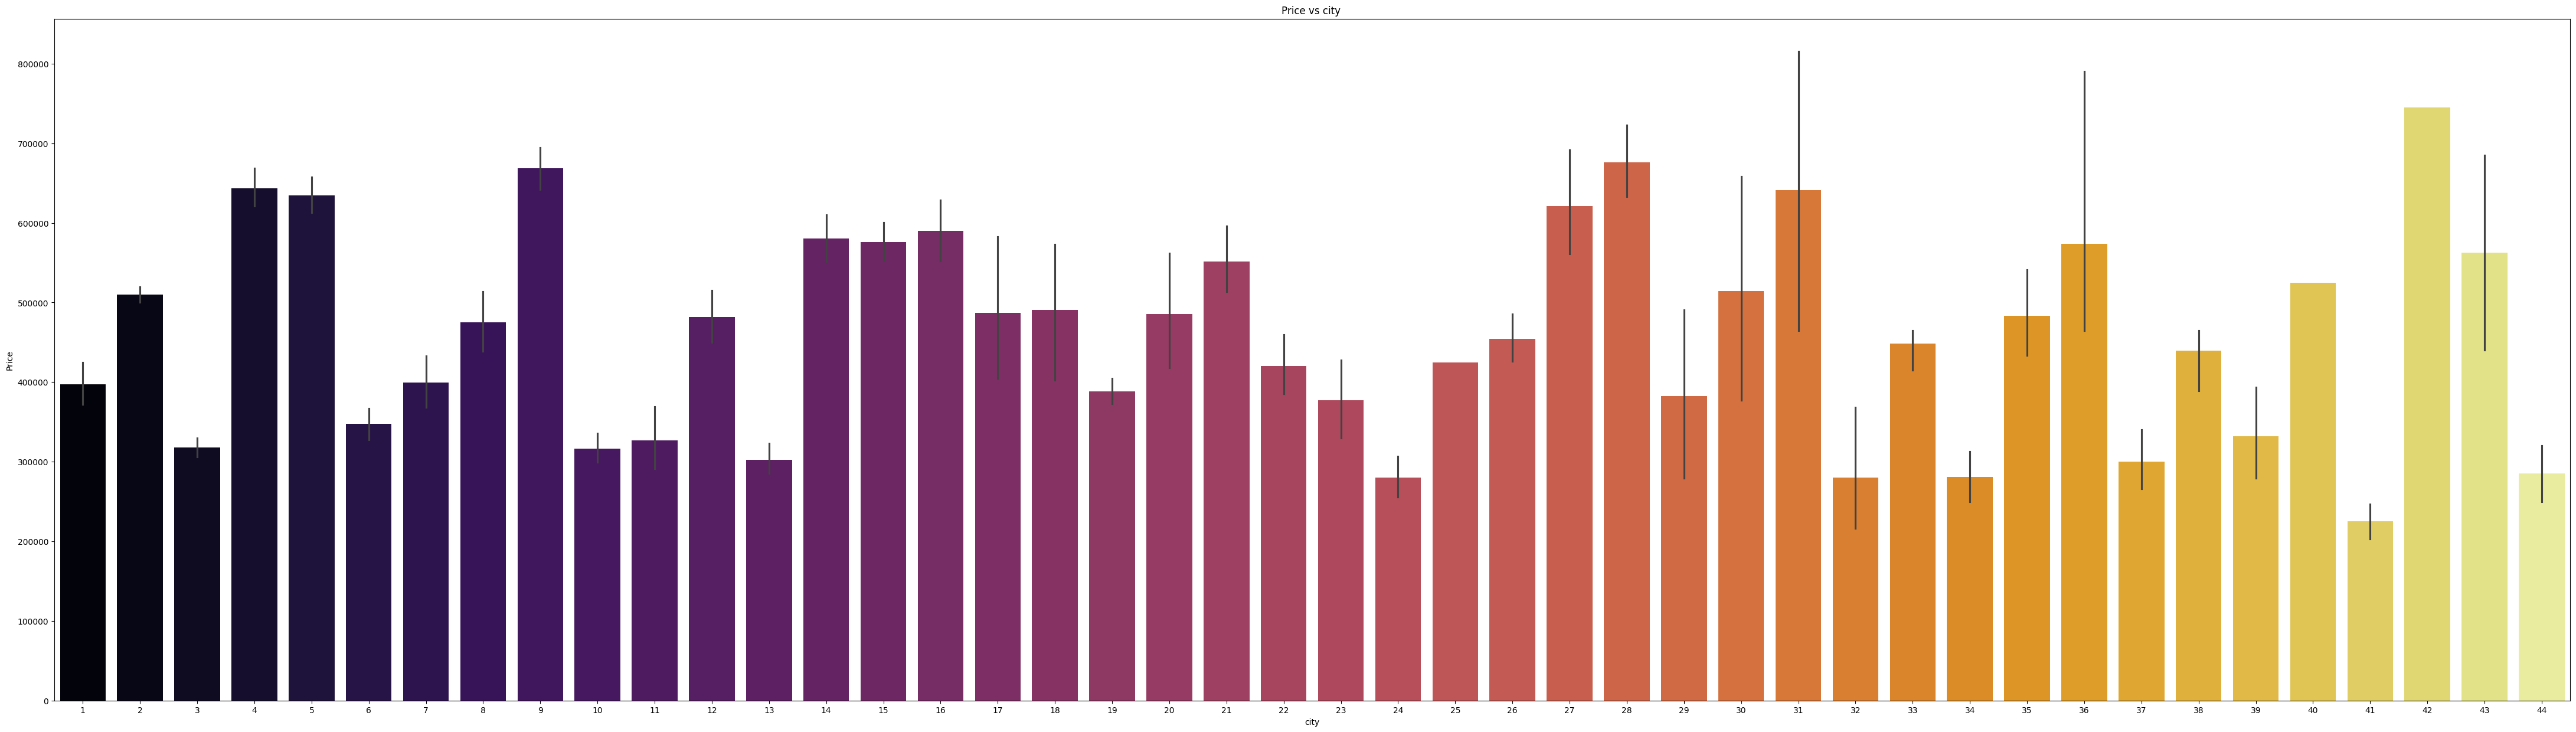

In [449]:

mp.figure(figsize=(55, 15))
sn.barplot(x='city', y='price', data=data, palette='inferno')
mp.title('Price vs city ')
mp.xlabel('city')
mp.ylabel('Price')
mp.show()

<ipython-input-450-79a4b2a56c13>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x='condition', y='price', data=data, palette='plasma')


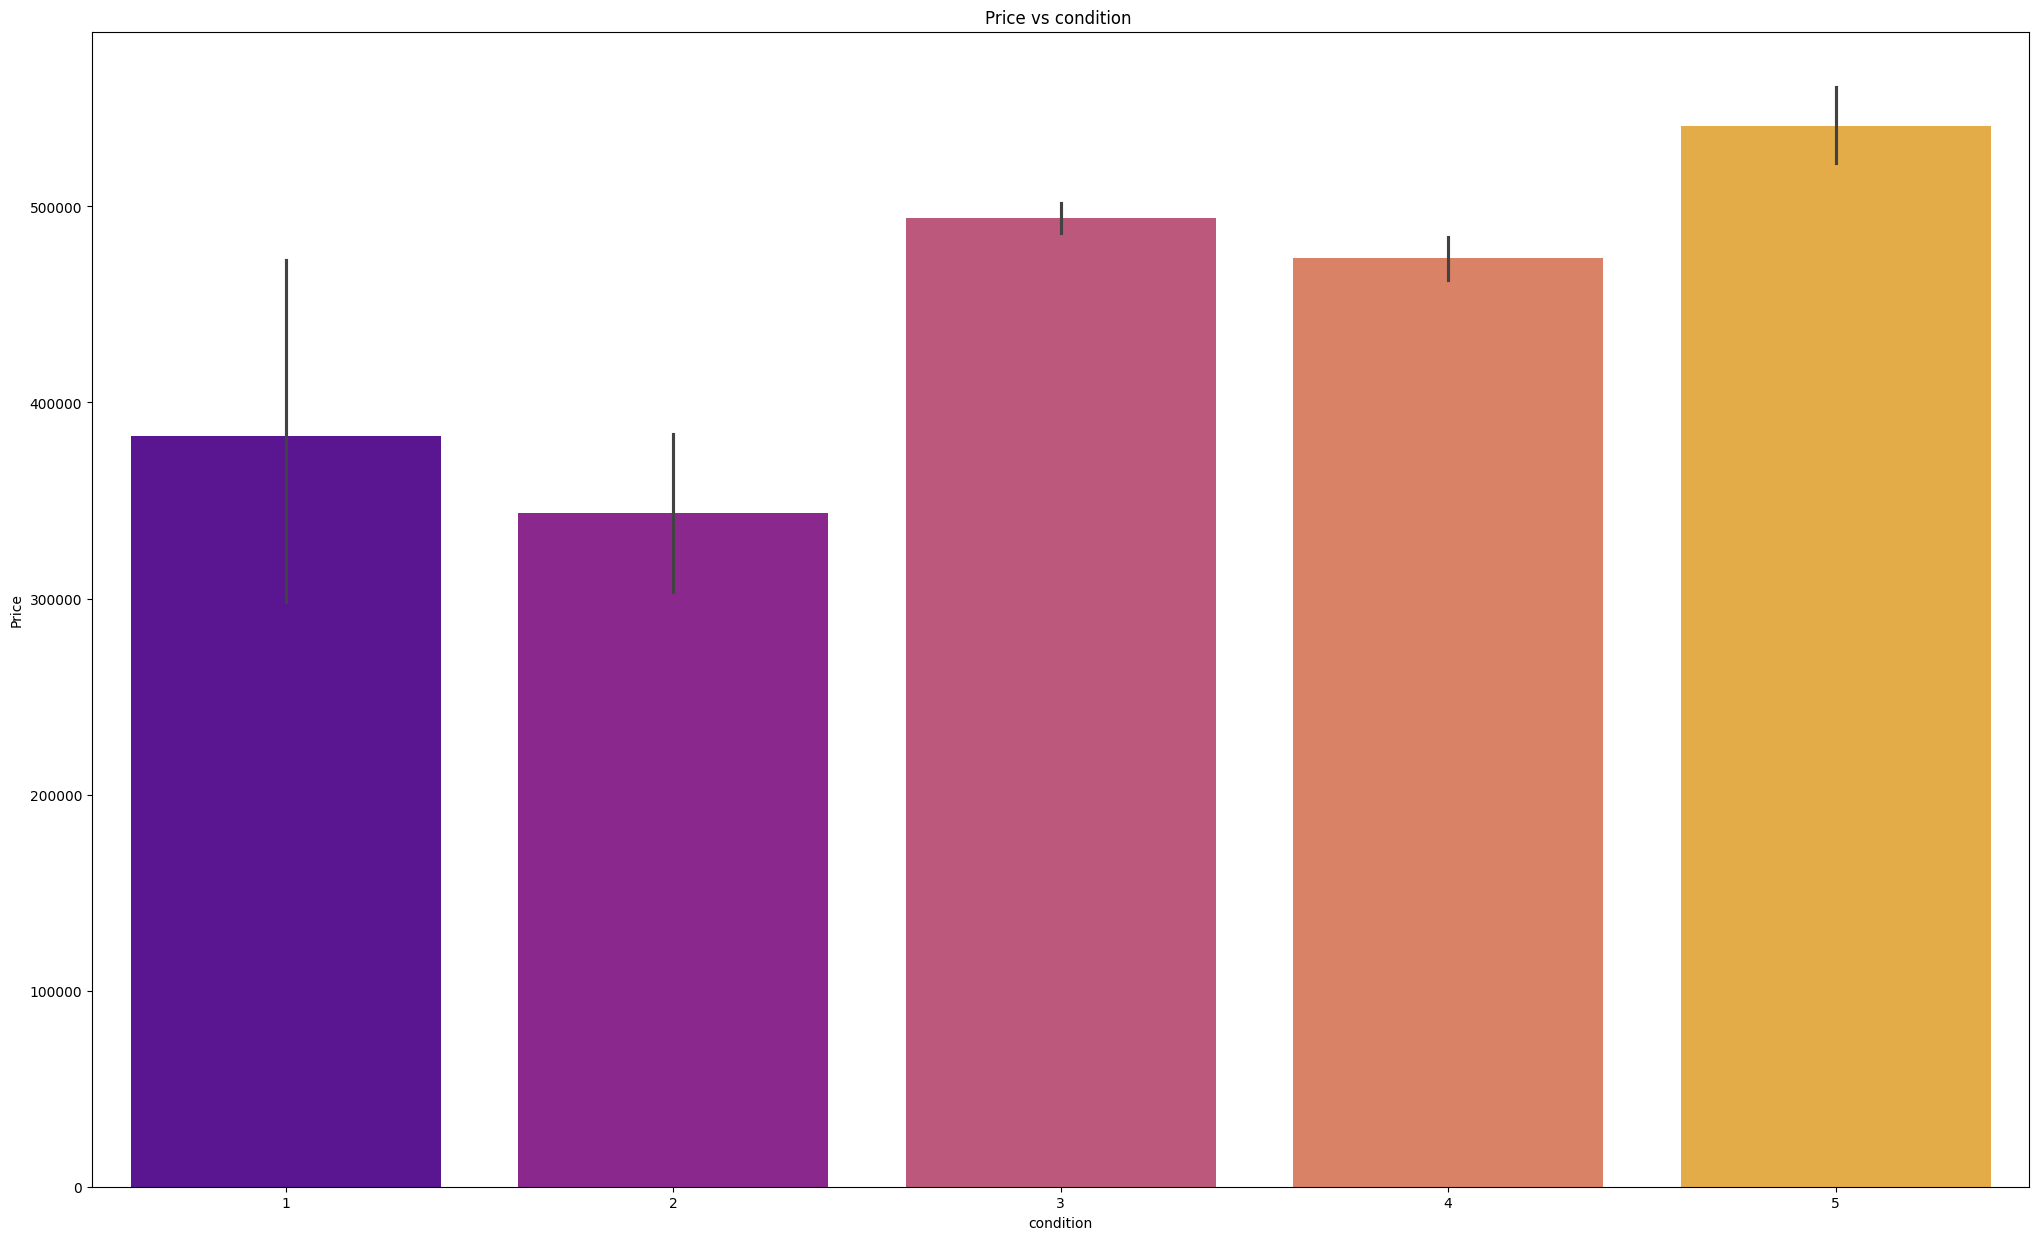

In [450]:
mp.figure(figsize=(25, 15))
sn.barplot(x='condition', y='price', data=data, palette='plasma')
mp.title('Price vs condition ')
mp.xlabel('condition')
mp.ylabel('Price')
mp.show()

<ipython-input-451-20df1d3442e1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x=br, y='price', data=data, palette='plasma')


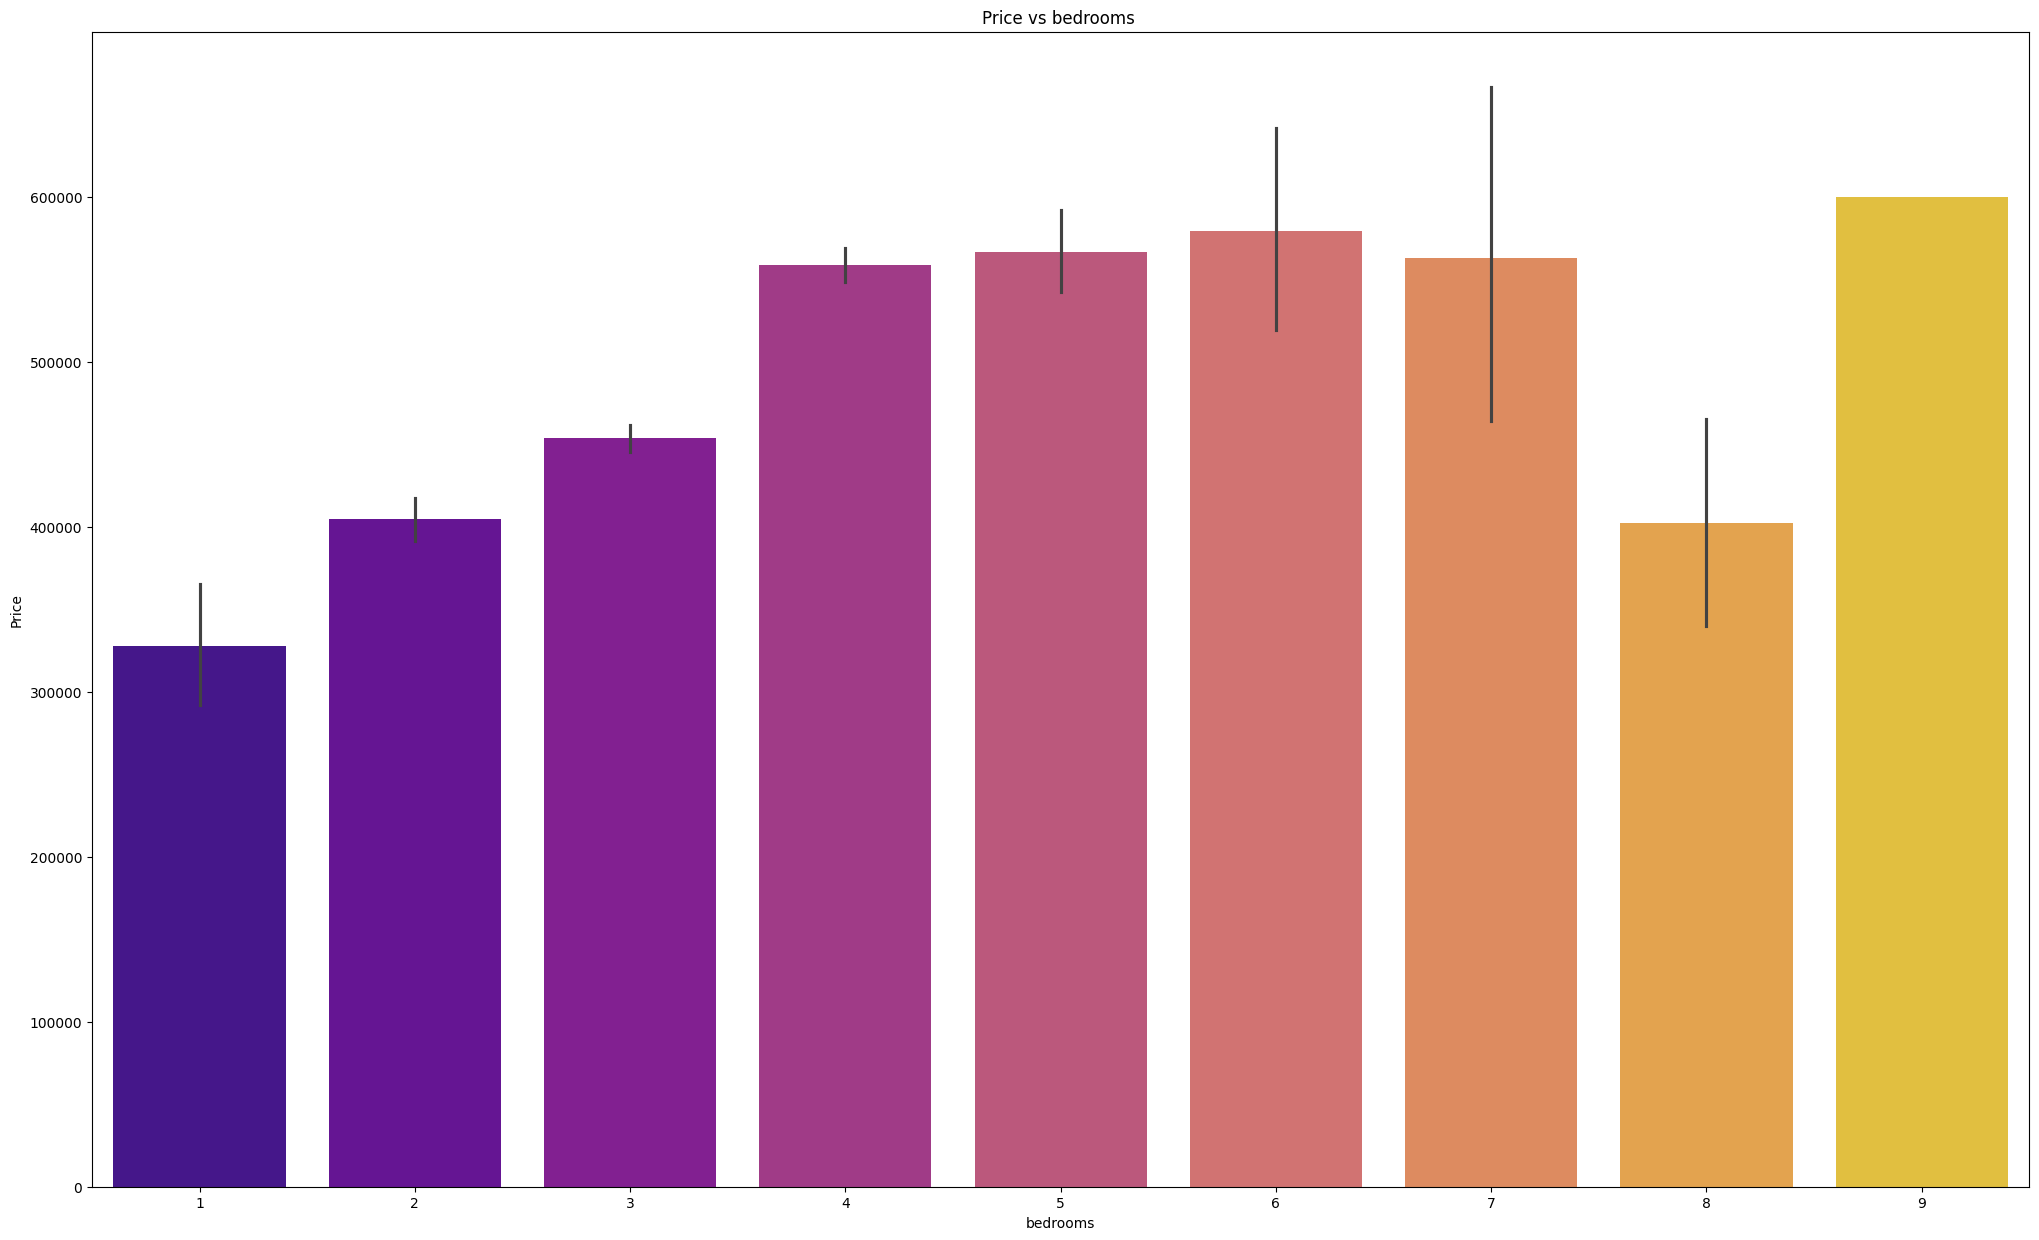

In [451]:
br=data['bedrooms'].astype(int)
mp.figure(figsize=(25, 15))
sn.barplot(x=br, y='price', data=data, palette='plasma')
mp.title('Price vs bedrooms ')
mp.xlabel('bedrooms')
mp.ylabel('Price')
mp.show()

<ipython-input-452-a03c0f1e9867>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x=f, y='price', data=data, palette='plasma')


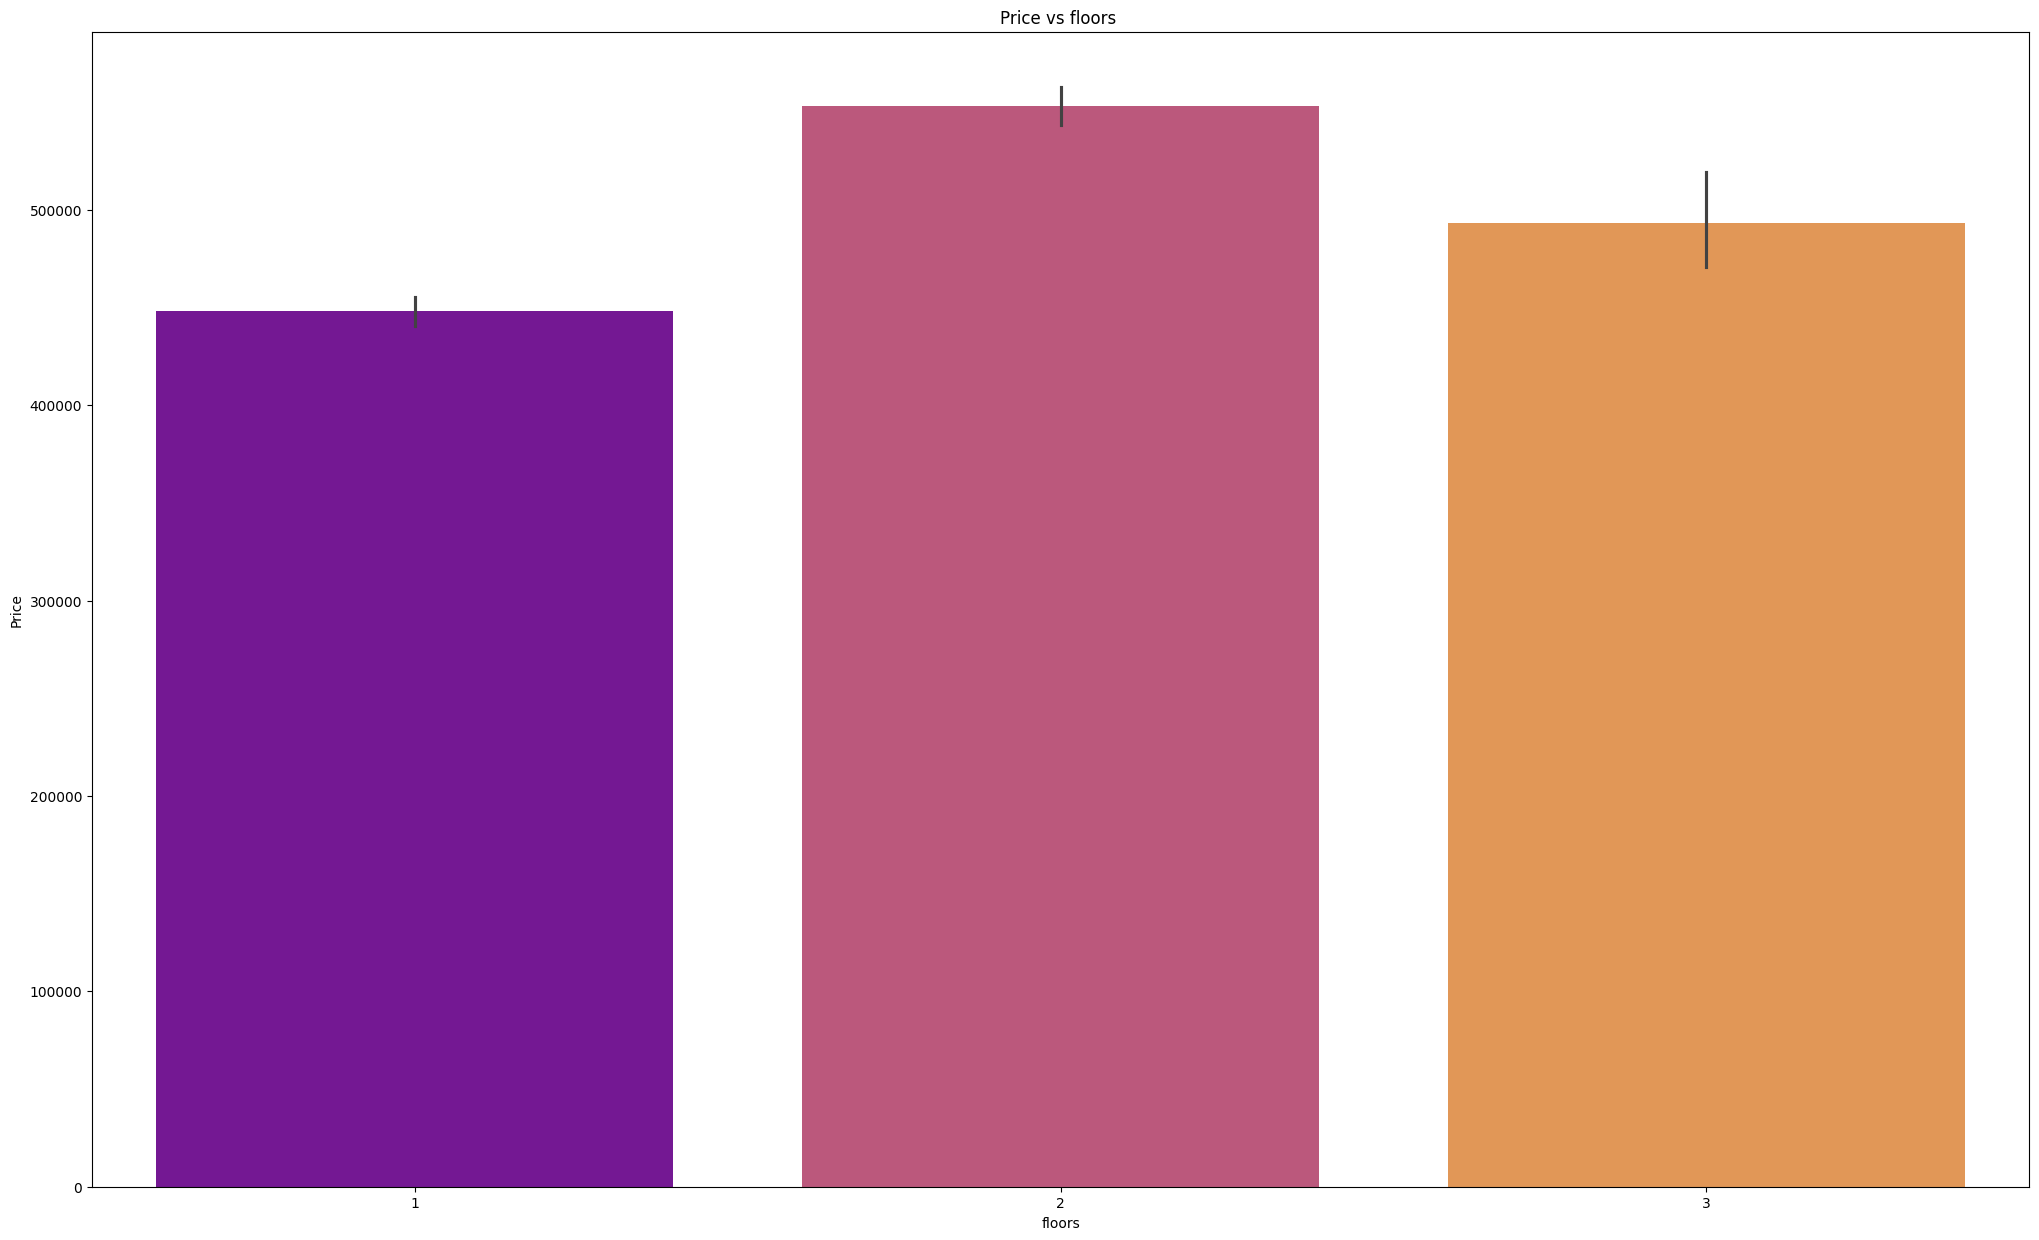

In [452]:
f=data['floors'].astype(int)
mp.figure(figsize=(25, 15))
sn.barplot(x=f, y='price', data=data, palette='plasma')
mp.title('Price vs floors ')
mp.xlabel('floors')
mp.ylabel('Price')
mp.show()

<Axes: >

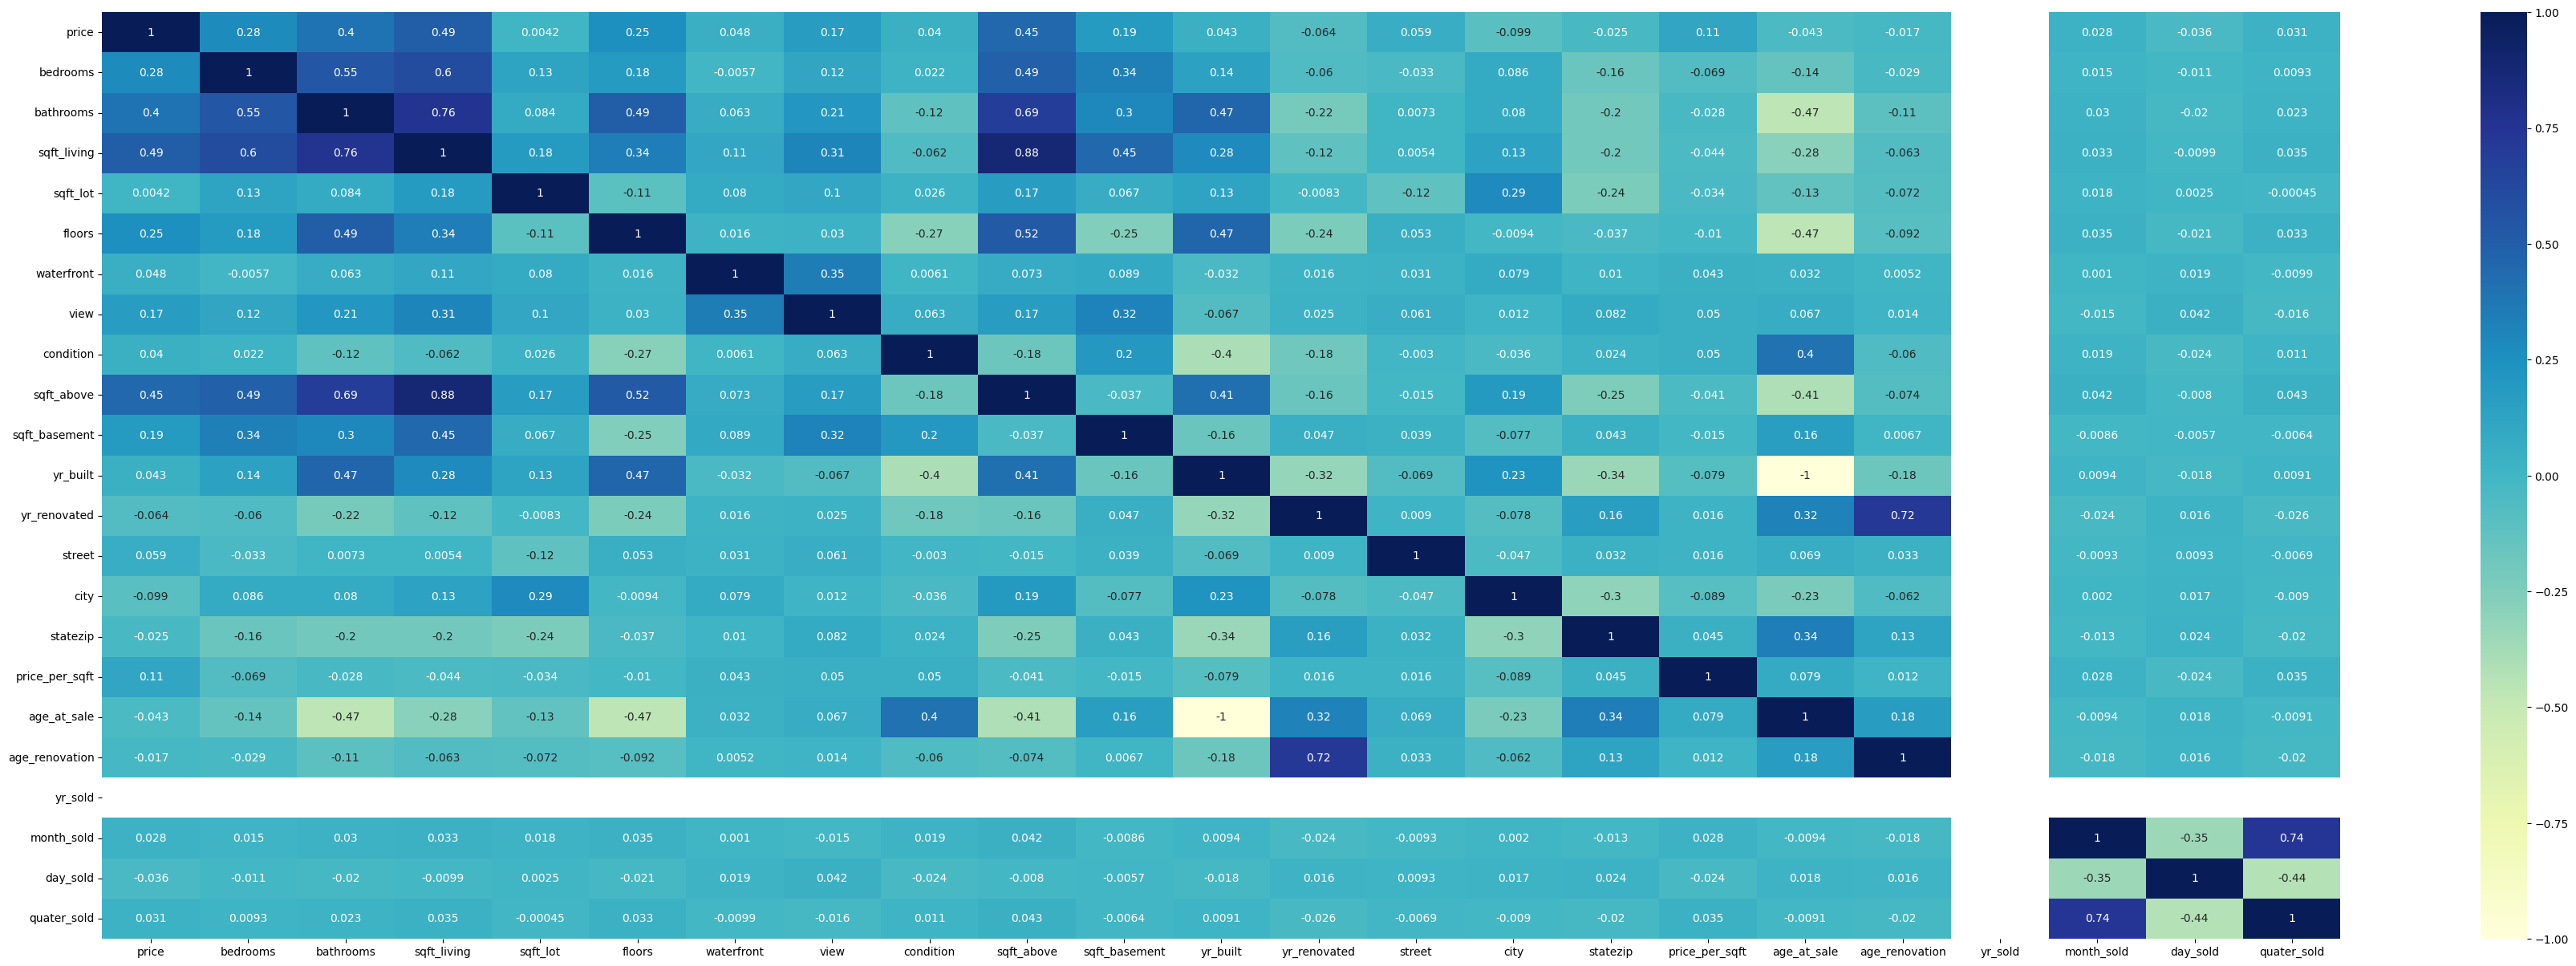

In [453]:
mp.figure(figsize=(45, 15))
sn.heatmap(data.corr(),annot=True,cmap='YlGnBu')

# **Models Building**

In [454]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'street', 'city', 'statezip',
       'price_per_sqft', 'age_at_sale', 'age_renovation', 'yr_sold',
       'month_sold', 'day_sold', 'quater_sold'],
      dtype='object')

In [455]:
X=data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'street', 'city', 'statezip',
       'price_per_sqft', 'age_at_sale', 'age_renovation', 'yr_sold']]
Y=data['price']

In [456]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,price_per_sqft,age_at_sale,age_renovation,yr_sold
0,3.0,1.50,1340,7912.0,1.5,0,0,3,1340,0,1955,2005,1507,1,62,233.582090,69,19,2014
1,5.0,2.50,3650,9050.0,2.0,0,4,5,3370,280,1921,0,3852,2,58,653.150685,103,0,2014
2,3.0,2.00,1930,11947.0,1.0,0,0,4,1930,0,1966,0,2266,3,26,177.202073,58,0,2014
3,3.0,2.25,2000,8030.0,1.0,0,0,4,1000,1000,1963,0,4214,4,7,210.000000,61,0,2014
4,4.0,2.50,1940,10500.0,1.0,0,0,4,1140,800,1976,1992,4303,5,31,283.505155,48,32,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.0,1.75,1510,6360.0,1.0,0,0,4,1510,0,1954,1979,3403,2,62,204.083885,70,45,2014
4596,3.0,2.50,1460,7573.0,2.0,0,0,3,1460,0,1983,2009,948,4,6,365.981735,41,15,2014
4597,3.0,2.50,3010,7014.0,2.0,0,0,3,3010,0,2009,0,3985,19,37,138.506368,15,0,2014
4598,4.0,2.00,2090,6630.0,1.0,0,0,3,1070,1020,1974,0,3453,2,71,97.320574,50,0,2014


In [457]:
Y

,price
0,313000
1,465000
2,342000
3,420000
4,550000
...,...
4595,308166
4596,534333
4597,416904
4598,203400


# **Feature Importance**

In [458]:
import sklearn
from sklearn.feature_selection import mutual_info_regression

In [459]:
feature=mutual_info_regression(X,Y)

In [460]:
imp=pd.DataFrame(feature,index=X.columns)
imp.columns=['importance']

In [461]:
imp.sort_values(by='importance',ascending=False)

,importance
statezip,0.359034
sqft_living,0.292455
city,0.288848
price_per_sqft,0.211478
sqft_above,0.193257
bathrooms,0.152095
age_at_sale,0.081328
yr_built,0.075354
floors,0.060315
sqft_lot,0.051120


In [462]:
# According to feature importance removing unnecessary variables
X=data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'sqft_above', 'sqft_basement',
       'yr_built', 'city', 'statezip',
       'price_per_sqft', 'age_at_sale', 'age_renovation']]

# **Feature Scaling**

In [463]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [464]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Applying Model**

In [465]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error

# **Automating ML pipeline and Defining Evaluation metric**

In [466]:
from sklearn import metrics

from sklearn.model_selection import cross_val_score, KFold # cross validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

def pred(ml_model):
    model=ml_model.fit(X_train,y_train)
    print('training Score: {}'.format(model.score(X_train,  y_train)))
    prediction=model.predict(X_test)
    #print('Predictions are: {}'.format(prediction))
    print('\n')
    r2_score=metrics.r2_score(y_test, prediction)
    print('R2 score: {}'.format(r2_score))
    cross_val_results = cross_val_score(model, X_test, y_test, cv=kf)
    print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
    print(f'Mean Accuracy: {cross_val_results.mean()}')

# **Linear Regression**

In [467]:
 pred(LinearRegression())


training Score: 0.3389702983004408


R2 score: 0.15928834732763963
Cross-Validation Results (Accuracy): [ 0.4682938   0.35419107 -0.23734824  0.23757131  0.34343228]
Mean Accuracy: 0.23322804527518476


# **Decision Tree Regression**

In [468]:
pred(DecisionTreeRegressor())

training Score: 1.0


R2 score: 0.8618135345043773
Cross-Validation Results (Accuracy): [0.85278132 0.79947845 0.78927666 0.57954343 0.70104673]
Mean Accuracy: 0.7444253175964461


# **Random Forest Regression**

In [469]:
pred(RandomForestRegressor())

training Score: 0.9910027478063547


R2 score: 0.9236217035336891
Cross-Validation Results (Accuracy): [0.87465844 0.88885463 0.86705166 0.89052759 0.90583403]
Mean Accuracy: 0.8853852681135171


# **Gradient Boosting Resgressor**

In [470]:
pred(GradientBoostingRegressor())

training Score: 0.9084468253623085


R2 score: 0.8602040515363318
Cross-Validation Results (Accuracy): [0.86265302 0.81694697 0.82997766 0.86456236 0.8667385 ]
Mean Accuracy: 0.8481757036387837


In [472]:
pred(Lasso(alpha=0.1) )

training Score: 0.3389702982505475


R2 score: 0.15929042570120233
Cross-Validation Results (Accuracy): [ 0.46829413  0.35418981 -0.23734398  0.23756964  0.34343513]
Mean Accuracy: 0.2332289466272813


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.766e+12, tolerance: 1.526e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.185e+11, tolerance: 3.134e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.076e+12, tolerance: 3.079e

In [473]:
pred( Ridge(alpha=1.0))

training Score: 0.338967969202122


R2 score: 0.15969061494435488
Cross-Validation Results (Accuracy): [ 0.46877387  0.35390903 -0.23582873  0.23743095  0.34919919]
Mean Accuracy: 0.2346968618038699
